<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Nombre: Alan Taipe

Este notebook está diseñado parcticar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

In [46]:
import numpy as np  # Para generación de datos y operaciones numéricas
import pandas as pd  # Para manejo de datos estructurados
import matplotlib.pyplot as plt  # Para visualización de datos
from sklearn.linear_model import LinearRegression  # Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score  # Para evaluación del modelo
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns #Correlaciones
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, RobustScaler,StandardScaler, Normalizer, QuantileTransformer, PowerTransformer)

In [2]:
url = "https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv"

---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [3]:
df = pd.read_csv(url)
# Mostrar las primeras 5 filas
print("Shape del DataFrame:", df.shape)
df.head()

Shape del DataFrame: (21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza una normalización de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

In [4]:
#Dejamos las variables que nos sirven
columnas_deseadas = [
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors'
]

df = df[columnas_deseadas]
print("Base de datos con solo las columnas seleccionadas:")
df.head()

Base de datos con solo las columnas seleccionadas:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
0,221900.0,3,1.00,1180,5650,1.0
1,538000.0,3,2.25,2570,7242,2.0
2,180000.0,2,1.00,770,10000,1.0
3,604000.0,4,3.00,1960,5000,1.0
4,510000.0,3,2.00,1680,8080,1.0


In [15]:
#Verificamos si faltan datos
df.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0


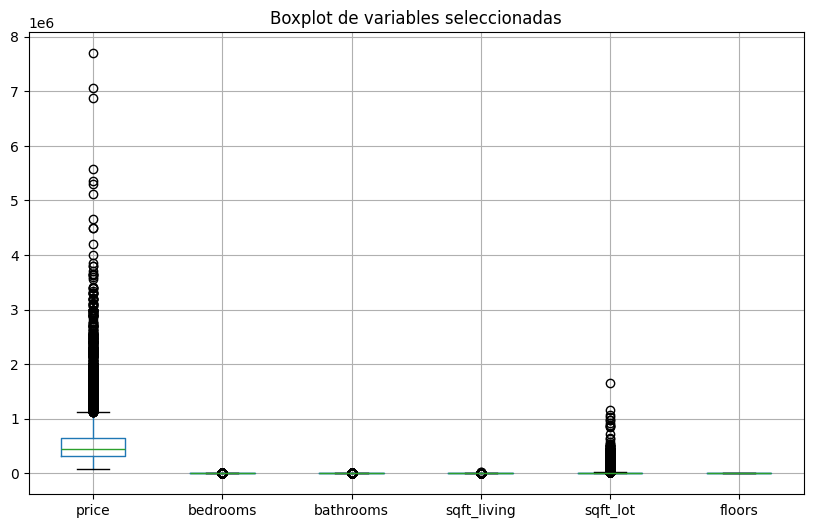

In [16]:
#Buscamos valores atípicos
df.boxplot(figsize=(10,6))
plt.title("Boxplot de variables seleccionadas")
plt.show()

Podemos ver que hay valores absurdos que se alejan de los demas como price (pero price es mi variable objetiva) entonces concluyo que la variable que va a joder mi modelo es sqft_lot.


In [24]:
#Elimino los datos de sqft_lot
#ya que por el momento mi meta es un mercado en especifico, MERCADO NORMAL
df = df[df['sqft_lot'] < 500000]

In [25]:
#tmb voy a quitar las casa de 3mill, para tener un mercado aun mas especifico
df = df[df['price'] < 3000000]

In [30]:
#reviso duplicados
df.duplicated().sum()
#si hay, los borro
df = df.drop_duplicates()

In [31]:
#Porseaca hago una est descriptiva
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors
count,2.153200e+04,21532.000000,21532.000000,21532.000000,21532.000000,21532.000000
mean,5.321813e+05,3.368336,2.108884,2069.891278,14324.052248,1.492987
std,3.275329e+05,0.927639,0.760078,893.520255,32143.748587,0.539462
min,7.500000e+04,0.000000,0.000000,290.000000,520.000000,1.000000
25%,3.200000e+05,3.000000,1.500000,1420.000000,5040.000000,1.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7600.500000,1.500000
75%,6.400000e+05,4.000000,2.500000,2540.000000,10622.250000,2.000000
max,2.998000e+06,33.000000,8.000000,13540.000000,499571.000000,3.500000


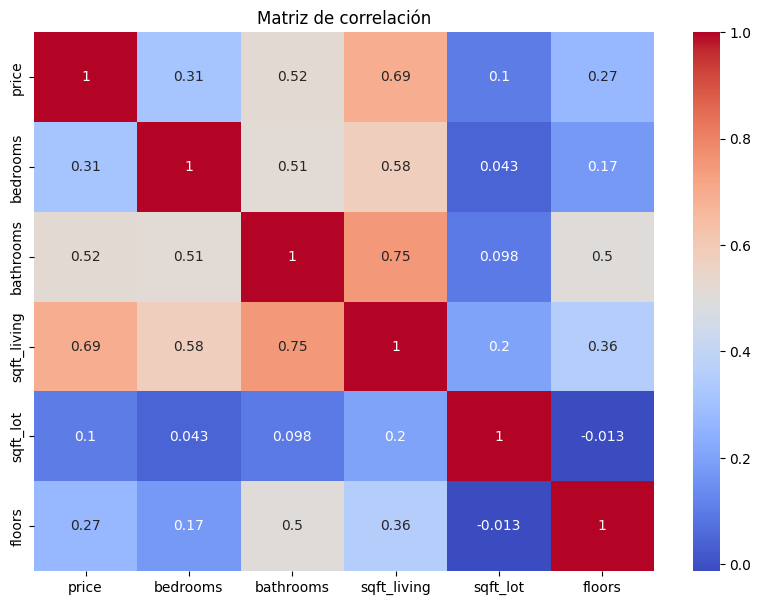

In [32]:
#Hago correlaciones para saber que variables realmente me sirven
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

Me doy cuenta que las variables que van de la mano son:
sqft living con price (0,7) y,


sqft living con bathrooms (0,75)

In [35]:
#Voy a hacer la normalizacion, pero en mi caso no voy a filtrar los outliers
#los voy a eliminar.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   # o RobustScaler según tu decisión
X_scaled = scaler.fit_transform(X)


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada conjunto.

Despues de hacer todo el EDA definimos X y Y

In [36]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = df['price']

In [37]:
print("Dimensiones de X (características):", X.shape)
print("Dimensiones de y (etiqueta):", y.shape)

Dimensiones de X (características): (21532, 5)
Dimensiones de y (etiqueta): (21532,)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [38]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% prueba, 80% entrenamiento
    random_state=0        # Para que la división sea reproducible
)

# Ver dimensiones
print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)
print("Dimensiones y_train:", y_train.shape)
print("Dimensiones y_test:", y_test.shape)

Dimensiones X_train: (17225, 5)
Dimensiones X_test: (4307, 5)
Dimensiones y_train: (17225,)
Dimensiones y_test: (4307,)


Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

Descriptivos y_train:
count    1.722500e+04
mean     5.320658e+05
std      3.242986e+05
min      7.500000e+04
25%      3.240000e+05
50%      4.500000e+05
75%      6.400000e+05
max      2.998000e+06
Name: price, dtype: float64

Descriptivos y_test:
count    4.307000e+03
mean     5.326432e+05
std      3.401989e+05
min      8.200000e+04
25%      3.150000e+05
50%      4.500000e+05
75%      6.400000e+05
max      2.920000e+06
Name: price, dtype: float64


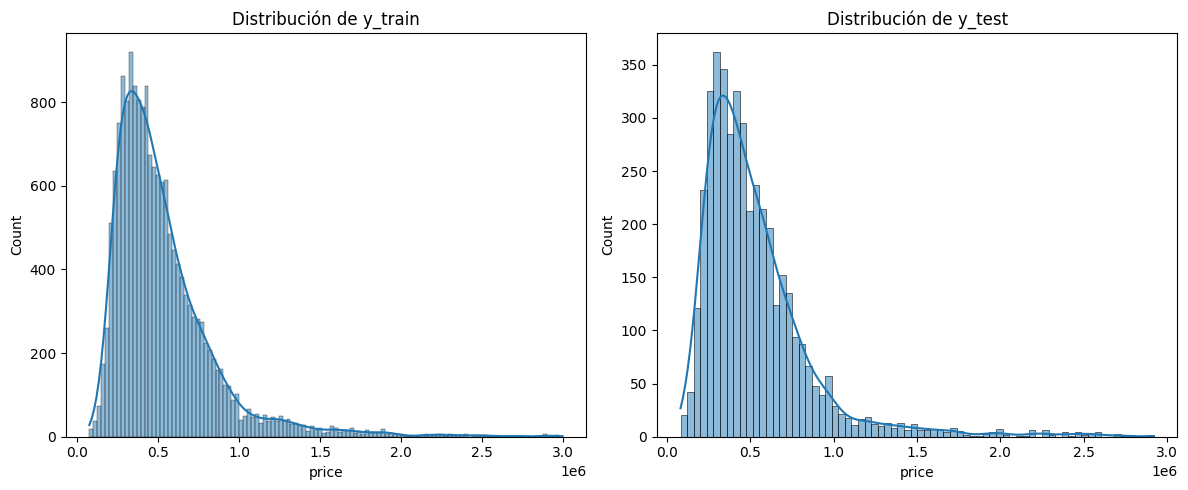

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estadísticos descriptivos
print("Descriptivos y_train:")
print(y_train.describe())

print("\nDescriptivos y_test:")
print(y_test.describe())

#hacemos hist para ver si son parecidos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(y_train, kde=True)
plt.title("Distribución de y_train")

plt.subplot(1,2,2)
sns.histplot(y_test, kde=True)
plt.title("Distribución de y_test")

plt.tight_layout()
plt.show()

No hay sesgo por precios altos o bajos

No hay alteraciones en la variabilidad

Los percentiles clave son idénticos

El test es una representación fiel del train

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y lo entrena con los datos de entrenamiento.

In [40]:
# Hago el modelo
modelo = LinearRegression()
#Entrenamos con los datos de entre
modelo.fit(X_train, y_train)

#Miramos coeficientes y el intercepto
print("Intercepto:", modelo.intercept_)
print("Coeficientes:", modelo.coef_)

Intercepto: 99186.52283074544
Coeficientes: [-4.74763804e+04  3.08566412e+03  2.79516385e+02 -5.32786521e-01
  1.03792593e+04]


veo que bedrooms no aporta valor real.

Conformo lo que vimos en la correlación baja con price.

El modelo es estable.
Los coeficientes tienen magnitudes razonables

Multicolinealidad detectada
Bedrooms debería eliminarse o evaluarse en modelos adicionales.

La variable dominante es sqft_living.

sqft_lot no aporta nada útil.
Se podría omitir tranquilamente.

Floors y bathrooms aportan, pero moderadamente.

---
## <font color='264CC7'> Evaluacion </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [41]:
y_pred = modelo.predict(X_test)

#Hacemos la tabla comparativa
tabla_predicciones = pd.DataFrame({'Precio Real': y_test.values,'Precio Predicho': y_pred})
print(tabla_predicciones.head(10))

   Precio Real  Precio Predicho
0     260000.0    381789.246587
1     295000.0    316878.021237
2     566000.0    432674.128714
3     500000.0    408341.358325
4     290000.0    485600.630426
5     542525.0    675488.495487
6     295000.0    450491.208200
7     590000.0    364009.311828
8     608095.0    724899.921055
9     500000.0    423761.460410


En casas baratas → predice demasiado alto

En casas caras → predice demasiado bajo

Esto indica que la recta de regresión está tratando de “promediar” todo, y no captura bien la variabilidad del mercado.

Falta de variables importantes

Ejemplo:

ubicación / zipcode (muy importante)

año de construcción

condición

vista


Quitamos muchas variables, por lo cual afectan el rendimiento.

Calcula el error cuadrático medio.

In [42]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 58168115623.4055


El modelo de regresión lineal no captura adecuadamente la relación entre las variables explicativas y el precio. El error es demasiado alto para ser en un contexto real. Pero son las variables que me dieron jajaja


Escribe el error cuadrático medio para cada tipo de normalización:

| Tipo de Escalado        | MSE                  |
| ----------------------- | -------------------- |
| **MaxAbsScaler**        | 58 168 115 623.40615 |
| **MinMaxScaler**        | 58 168 115 623.40614 |
| **RobustScaler**        | 58 168 115 623.40615 |
| **StandardScaler**      | 58 168 115 623.40614 |
| **Normalizer**          | 87 831 211 728.18251 |
| **QuantileTransformer** | 67 396 215 054.87056 |
| **PowerTransformer**    | 67 861 607 926.79686 |


In [44]:
escaladores = {
    "MaxAbsScaler": MaxAbsScaler(),"MinMaxScaler": MinMaxScaler(),"RobustScaler": RobustScaler(),"StandardScaler": StandardScaler(),"Normalizer": Normalizer(),"QuantileTransformer": QuantileTransformer(output_distribution='normal'),
    "PowerTransformer": PowerTransformer()}

resultados_mse = {}

for nombre, scaler in escaladores.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    modelo = LinearRegression()
    modelo.fit(X_train_scaled, y_train)
    y_pred_scaled = modelo.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred_scaled)
    resultados_mse[nombre] = mse

resultados_mse

{'MaxAbsScaler': 58168115623.40615,
 'MinMaxScaler': 58168115623.40614,
 'RobustScaler': 58168115623.40615,
 'StandardScaler': 58168115623.40614,
 'Normalizer': 87831211728.18251,
 'QuantileTransformer': 67396215054.87056,
 'PowerTransformer': 67861607926.79686}

Escribe un párrafo sobre qué hace normalización no vista en clase:

- **Normalización:**
Transforma cada observación dividiendo todos sus valores entre la norma del vector fila, de modo que cada registro queda con una longitud total igual a 1. Esto no estandariza columnas ni ajusta escalas globales, sino que obliga a que cada fila sea un vector unitario. El efecto práctico es que la información de magnitud absoluta se pierde completamente: casas muy grandes y casas pequeñas quedan representadas por vectores de igual longitud y solo mantiene relaciones proporcionales internas dentro de cada instancia. Este tipo de normalización se usa en problemas de texto, distancias y clustering basados en coseno, pero es inadecuada para regresión tabular porque destruye la escala real de las variables y altera las relaciones lineales necesarias para que el modelo funcione. Por eso produce errores más altos y no debe utilizarse en este tipo de análisis.

---
## <font color='264CC7'> Cross Validation </font>

Realiza validación cruzada con 5 particiones y muestra el error cuadrático medio promedio con la normalización que mejor se ajuste a los datos para confirmar que el modelo no está sobreajustado.

In [47]:
pipeline = Pipeline([('scaler', StandardScaler()),('model', LinearRegression())])

#alidación cruzada de 5 particiones
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

#Calcular el RMSE en cada partición (neg_mean_squared_error devuelve negativo)
scores = cross_val_score(pipeline,X, y,scoring='neg_mean_squared_error',cv=kfold)

#Promedio del RMSE
rmse_scores = np.sqrt(-scores)
print("RMSE de cada partición:", rmse_scores)
print("RMSE promedio:", rmse_scores.mean())

RMSE de cada partición: [238077.962851   242709.80452916 222892.61654953 226865.66036382
 236707.16247111]
RMSE promedio: 233450.64135292298


Comportamiento del modelo es estable:

No hay saltos bruscos entre particiones.

El RMSE promedio es coherente con los errores individuales.

El modelo no muestra señales de sobreajuste significativo.